<h1 align="center">Computational Methods in Environmental Engineering</h1>
<h2 align="center">Lecture #22</h2>
<h3 align="center">16 May 2023</h3>



## Machine learning



-   `scikit-learn` is the most widely used ML library in Python
-   standard supervised and unsupervised machine learning methods
-   models that can be used for classification, clustering, prediction



<center><img src="https://i.imgur.com/KUqQldg.png" /></center>



### Install it!



In [ ]:
%conda install scikit-learn

## Let's download some datasets!



Go to [https://www.sciencebase.gov/catalog/item/5a58af4fe4b00b291cd6a5fb](https://www.sciencebase.gov/catalog/item/5a58af4fe4b00b291cd6a5fb)and download these files

-   `BASIN_CHARACTERISTICS.csv`
-   `MON_P_CRU_19012015.csv`
-   `MON_T_CRU_19012015.csv`



and load them up



In [1]:
import pandas as pd
b = pd.read_csv("../data/BASIN_CHARACTERISTICS.csv")
p = pd.read_csv("../data/MON_P_CRU_19012015.csv")
t = pd.read_csv("../data/MON_T_CRU_19012015.csv")

In [2]:
b.head()

,station id,lon,lat,area,elev
0,1112200,-11.38,13.23,15000,329.1
1,1112400,-11.23,12.31,9300,406.8
2,1134050,-8.17,11.58,34200,494.6
3,1134200,-6.80,12.52,32500,411.9
4,1147200,17.38,-3.18,737640,844.5


In [3]:
p.head()

,station id,190101,190102,190103,190104,190105,190106,190107,190108,190109,...,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512
0,1112200,0.00000,0.000,0.000,0.478,7.86,5.160,7.180,14.100,9.71,...,0.000,0.597,1.06,2.870,8.770,16.700,6.81,6.15,0.000208,0.0000
1,1112400,0.00334,0.000,0.000,0.651,9.31,5.550,7.470,14.600,10.30,...,0.000,0.830,1.30,3.260,9.280,17.300,7.52,6.86,0.000000,0.0000
2,1134050,0.14300,0.528,1.510,3.100,4.76,6.250,8.110,10.600,9.39,...,0.333,1.580,2.75,4.910,8.040,11.900,6.39,7.42,1.020000,0.0992
3,1134200,0.04860,0.161,0.696,1.770,3.35,4.850,7.430,9.590,7.13,...,0.105,0.571,1.77,4.400,7.590,10.000,4.45,4.42,0.430000,0.0111
4,1147200,5.61000,5.310,6.000,6.150,2.08,0.252,0.205,0.851,2.61,...,6.950,4.680,2.27,0.182,0.158,0.669,2.74,4.20,7.080000,7.6900


## Clustering



-   One of the simplest unsupervised classification methods
-   We will focus on the **k-means** clustering algorithm



In [4]:
from sklearn.cluster import KMeans

## K-means clustering



Clusters data by trying to separate samples in n groups of equal variance

$$\sum_{i=0}^{n} \min\limits_{\mu_{j} \in C} (||x_{i} - \mu_{j}||^{2})$$

Inertia, or the within-cluster sum of squares criterion is a measure of how internally coherent clusters are. Let's look at an example



In [5]:
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

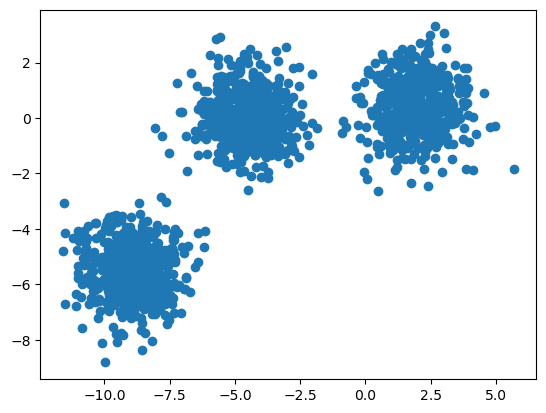

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

Now let's cluster the data and predict their label



In [11]:
?KMeans

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, n_init='auto', random_state=random_state).fit(X)
y_pred = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

## ☛ Hands-on exercise



Let's try to classify the basins according to mean temperature and precipitation!

Create the appropriate arrays to be used as inputs to clustering algorithm



Cluster basins according to temperature and precipitation



Now plot the results



Do you need to add any more features?



## How do we select the number of clusters?



When the true labels are unknown, we can use Silhouette Analysis to evaluate the number of clusters



Silhouette coefficient is defined as
$$s = \dfrac{b-a}{max(a,b)}$$
where $a$ is the mean distance between a sample and all other points in the same class, and $b$ is the mean distance between a sample and all other points in the next nearest cluster.



### Silhouette analysis example



In [ ]:
from sklearn import metrics
labels = model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

### ☛ Hands-on exercise



Use Silhouette Analysis to evaluate the number of clusters for the basins



Perform the clustering on the basins data and calculate the Silhouette coefficient as a function of number of clusters



Plot the relationship between them.



## Support Vector Machines



Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.



The advantages of support vector machines are:

-   Effective in high dimensional spaces
-   Still effective in cases where number of dimensions is greater than the number of samples
-   Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient



### We will focus on regression



Let's try an example



In [ ]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y)

In [ ]:
clf.predict([[1, 1]])

### ☛ Hands-on exercise



Now let's try to use SVMs to predict mean temperature as a function of elevation



Build a regression using SVMs on the basin data



In [ ]:
from sklearn.model_selection import train_test_split

Split the dataset into training and validation subsets



Is the regression model any good?

